Assumption function

In [33]:
import numpy as np
from attr import attributes
from self import self

# y=ax1+b
a=1
b=2
x1=3
y = a*x1+b
print(y)

5


In [34]:
theta = np.array([[b], [a]])
X = np.array([[1, x1]])
y = X@theta
print(y)

[[5]]


In [35]:
import numpy as np

def _linear_hypothesis(self, X):
    # Initialize y as a zero vector of appropriate size
    y = np.zeros(X.shape[0])

    # Calculate the linear hypothesis using the coefficients
    for j in range(len(self.coef_)):
        y += self.coef_[j] * X[:, j]

    # dot_product = np.dot(X, self.coef_)

    return y


Most rapid descent method

In [36]:
def _gradient_descent(self, X, error):
    m = X.shape[0]
    n = X.shape[1]
    for j in range(n):
        gradient = 0
        for i in range(m):
            gradient += (error[i]) - X[j][i]
        self.coef_[j] = self.coef_[j] - (self.lr/m) * gradient


In [37]:
def __init__(self, num_iter, lr, no_bias, verbose):
    # recording the hyperparameters as attributes
    self.num_iter = num_iter
    self.lr = lr
    self.no_bias = no_bias
    self.verbose = verbose
    # preparing array to record the loss
    self.loss = np.zeros(self.iter)
    self.val_loss = np.zeros(self.iter)
def fit(self, X, y, X_val=None, y_val=None):
    # initializing the coefficients
    self.coef_ = np.zeros(X.shape[1])

    for i in range(self.iter):
        # predicting using the current coeeficients
        pred = self.predict(X)
        # calculating the error
        error = pred-y
        # updating the coefficients using the gradient
        self._gradient_descent(X, error)
def _gradient_descent(self, X, error):
    m = X.shape[0]
    n = X.shape[1]
    for j in range(n):
        gradient = 0
        for i in range(m):
            gradient += (error[i]) - X[j][i]
            self.coef_[j] = self.coef_[j] - (self.lr/m) * gradient

presumption

In [38]:
def predict(self, X):
    if self.bias == True:
        bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack((bias, X))
    pred_y = self._linear_hypothesis(X)
    return pred_y


Mean Square error

In [39]:
def MSE(self, y_pred, y):
    mse = ((y_pred - y) ** 2).sum() / X.shape[0]
    return mse


Objective function

In [47]:
def lossfunction(self, y_pred, y):
    mse = ((y_pred - y) ** 2).sum() / X.shape[0]
    return mse


In [48]:
def fit(self, X, y, X_val=None, y_val=None):
    # initializing coefficients
    self.coef_ = np.zeros(X.shape[1])

    for i in range(self.num_iter):
        # predicting using current coefficients
        pred = self.predict(X)
        # calculating the error
        error = pred-y
        # updating coefficients using gradient
        self._gradient_descent(X, error)


Learning and Estimation

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class ScratchLinearRegression():
    def __init__(self, num_iter=2500, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    def predict(self, X):
        if not self.no_bias and X.shape[1] == self.coef_.shape[0] - 1:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self._linear_hypothesis(X)

    def _gradient_descent(self, X, error):
        gradient = np.dot(X.T, error) / X.shape[0]
        self.coef_ -= self.lr * gradient  # Update weights

    def MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def lossfunction(self, y_pred, y):
        return self.MSE(y_pred, y)

    def fit(self, X, y, X_val=None, y_val=None):
        num_features = X.shape[1] + (not self.no_bias)
        self.coef_ = np.random.randn(num_features) * 0.01  # Initialize weights
        if not self.no_bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])  # Add bias term for validation

        for i in range(self.iter):
            pred = self.predict(X)
            error = pred - y
            self._gradient_descent(X, error)
            self.loss[i] = self.lossfunction(pred, y)  # Compute training loss
            if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)
                self.val_loss[i] = self.lossfunction(pred_val, y_val)

            if self.verbose and i % 10 == 0:
                val_loss = self.val_loss[i] if X_val is not None else 0
                print(f"Epoch {i}, Loss: {self.loss[i]:.4f}, Val Loss: {val_loss:.4f}")

# Loading the data
df = pd.read_csv('application_train.csv')

features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
target = 'TARGET'

df = df[features + [target]].dropna()
X = df[features].values
y = df[target].values

# Data splitting and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model creation and training
model = ScratchLinearRegression(num_iter=2500, lr=0.01, no_bias=False, verbose=True)
model.fit(X_train, y_train, X_test, y_test)

# Estimation and evaluation
y_pred = model.predict(X_test)
mse = model.MSE(y_pred, y_test)
print(f"Mean Squared Error: {mse:.4f}")

Epoch 0, Loss: 0.0842, Val Loss: 0.0813
Epoch 10, Loss: 0.0824, Val Loss: 0.0797
Epoch 20, Loss: 0.0809, Val Loss: 0.0784
Epoch 30, Loss: 0.0797, Val Loss: 0.0773
Epoch 40, Loss: 0.0788, Val Loss: 0.0764
Epoch 50, Loss: 0.0780, Val Loss: 0.0757
Epoch 60, Loss: 0.0773, Val Loss: 0.0751
Epoch 70, Loss: 0.0768, Val Loss: 0.0746
Epoch 80, Loss: 0.0764, Val Loss: 0.0743
Epoch 90, Loss: 0.0760, Val Loss: 0.0739
Epoch 100, Loss: 0.0758, Val Loss: 0.0737
Epoch 110, Loss: 0.0755, Val Loss: 0.0735
Epoch 120, Loss: 0.0753, Val Loss: 0.0733
Epoch 130, Loss: 0.0752, Val Loss: 0.0732
Epoch 140, Loss: 0.0751, Val Loss: 0.0731
Epoch 150, Loss: 0.0750, Val Loss: 0.0730
Epoch 160, Loss: 0.0749, Val Loss: 0.0729
Epoch 170, Loss: 0.0748, Val Loss: 0.0729
Epoch 180, Loss: 0.0748, Val Loss: 0.0728
Epoch 190, Loss: 0.0747, Val Loss: 0.0728
Epoch 200, Loss: 0.0747, Val Loss: 0.0728
Epoch 210, Loss: 0.0746, Val Loss: 0.0727
Epoch 220, Loss: 0.0746, Val Loss: 0.0727
Epoch 230, Loss: 0.0746, Val Loss: 0.0727
Epo

Plotting the Learning Curve

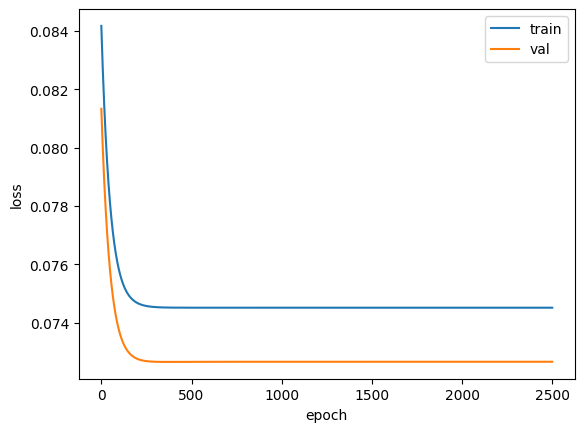

In [50]:
# Display the learning curve based on the losses recorded in self.loss and self.val_loss

import matplotlib.pyplot as plt

# Plotting the learning curve
plt.plot(model.loss, label='train')
plt.plot(model.val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Removing the bias term

Epoch 0, Loss: 0.0812, Val Loss: 0.0789
Epoch 10, Loss: 0.0812, Val Loss: 0.0789
Epoch 20, Loss: 0.0812, Val Loss: 0.0789
Epoch 30, Loss: 0.0811, Val Loss: 0.0789
Epoch 40, Loss: 0.0811, Val Loss: 0.0789
Epoch 50, Loss: 0.0811, Val Loss: 0.0789
Epoch 60, Loss: 0.0811, Val Loss: 0.0789
Epoch 70, Loss: 0.0811, Val Loss: 0.0789
Epoch 80, Loss: 0.0811, Val Loss: 0.0789
Epoch 90, Loss: 0.0811, Val Loss: 0.0789
Epoch 100, Loss: 0.0811, Val Loss: 0.0789
Epoch 110, Loss: 0.0811, Val Loss: 0.0789
Epoch 120, Loss: 0.0811, Val Loss: 0.0789
Epoch 130, Loss: 0.0811, Val Loss: 0.0789
Epoch 140, Loss: 0.0811, Val Loss: 0.0789
Epoch 150, Loss: 0.0811, Val Loss: 0.0789
Epoch 160, Loss: 0.0811, Val Loss: 0.0789
Epoch 170, Loss: 0.0811, Val Loss: 0.0789
Epoch 180, Loss: 0.0811, Val Loss: 0.0789
Epoch 190, Loss: 0.0811, Val Loss: 0.0789
Epoch 200, Loss: 0.0811, Val Loss: 0.0789
Epoch 210, Loss: 0.0811, Val Loss: 0.0789
Epoch 220, Loss: 0.0811, Val Loss: 0.0789
Epoch 230, Loss: 0.0811, Val Loss: 0.0789
Epo

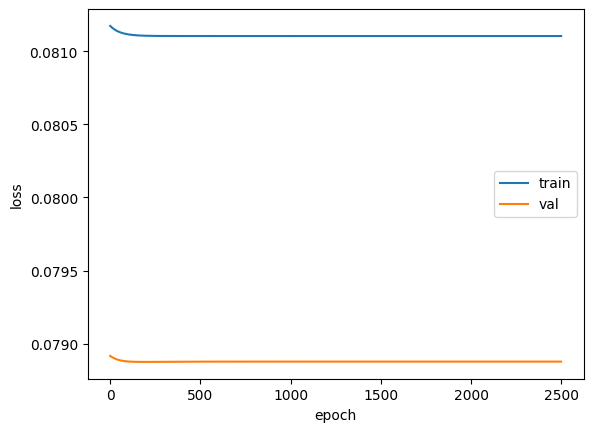

In [42]:
# Validate by removing the bias term from the previous code

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class ScratchLinearRegression():
    def __init__(self, num_iter=2500, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    def _gradient_descent(self, X, error):
        gradient = np.dot(X.T, error) / X.shape[0]
        self.coef_ -= self.lr * gradient


    def predict(self, X):
        # Processing without bias term
        return self._linear_hypothesis(X)

    def MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def lossfunction(self, y_pred, y):
        return self.MSE(y_pred, y)

    def fit(self, X, y, X_val=None, y_val=None):
        # Initialize without bias term
        self.coef_ = np.random.randn(X.shape[1]) * 0.01

        for i in range(self.iter):
            pred = self.predict(X)
            error = pred - y
            self._gradient_descent(X, error)
            self.loss[i] = self.lossfunction(pred, y)
            if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)
                self.val_loss[i] = self.lossfunction(pred_val, y_val)

            if self.verbose and i % 10 == 0:
                print(f"Epoch {i}, Loss: {self.loss[i]:.4f}, Val Loss: {self.val_loss[i]:.4f}")
# Loading data
df = pd.read_csv('application_train.csv')

features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
target = 'TARGET'

df = df[features + [target]].dropna()
X = df[features].values
y = df[target].values

# Data Splitting and Standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model creation and training (without bias term)
model = ScratchLinearRegression(num_iter=2500, lr=0.01, no_bias=True, verbose=True)

# Changed to no_bias=True
model.fit(X_train, y_train, X_test, y_test)

# Estimation and Evaluation
y_pred = model.predict(X_test)
mse = model.MSE(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

# Plotting the learning curve
plt.plot(model.loss, label='train')
plt.plot(model.val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Through showing the intercept with the bias term and offsetting it so that it can be adjusted to any position, we can see that we were able to estimate with less loss. Also, regardless of whether the bias term is used or not, there is almost no change in the loss over the first few hundred iterations. Compared to the plot examples in the text, the prediction accuracy of this program is low, therefore there is still room for making improvements

(Advanced) Multidimensional feature

Epoch 0, Loss: 0.0801, Val Loss: 0.0778
Epoch 10, Loss: 0.0790, Val Loss: 0.0768
Epoch 20, Loss: 0.0782, Val Loss: 0.0760
Epoch 30, Loss: 0.0775, Val Loss: 0.0753
Epoch 40, Loss: 0.0769, Val Loss: 0.0748
Epoch 50, Loss: 0.0765, Val Loss: 0.0744
Epoch 60, Loss: 0.0761, Val Loss: 0.0741
Epoch 70, Loss: 0.0758, Val Loss: 0.0738
Epoch 80, Loss: 0.0756, Val Loss: 0.0735
Epoch 90, Loss: 0.0754, Val Loss: 0.0734
Epoch 100, Loss: 0.0752, Val Loss: 0.0732
Epoch 110, Loss: 0.0751, Val Loss: 0.0731
Epoch 120, Loss: 0.0750, Val Loss: 0.0730
Epoch 130, Loss: 0.0749, Val Loss: 0.0729
Epoch 140, Loss: 0.0748, Val Loss: 0.0729
Epoch 150, Loss: 0.0747, Val Loss: 0.0728
Epoch 160, Loss: 0.0747, Val Loss: 0.0728
Epoch 170, Loss: 0.0746, Val Loss: 0.0727
Epoch 180, Loss: 0.0746, Val Loss: 0.0727
Epoch 190, Loss: 0.0746, Val Loss: 0.0727
Epoch 200, Loss: 0.0746, Val Loss: 0.0727
Epoch 210, Loss: 0.0745, Val Loss: 0.0727
Epoch 220, Loss: 0.0745, Val Loss: 0.0726
Epoch 230, Loss: 0.0745, Val Loss: 0.0726
Epo

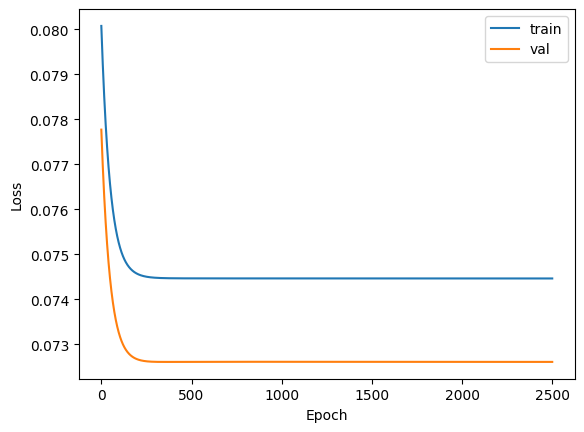

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class ScratchLinearRegression():
    def __init__(self, num_iter=2500, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    def _gradient_descent(self, X, error):
        gradient = np.dot(X.T, error) / X.shape[0]
        self.coef_ -= self.lr * gradient

    def predict(self, X):
        if not self.no_bias and X.shape[1] == self.coef_.shape[0] - 1:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self._linear_hypothesis(X)

    def MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def lossfunction(self, y_pred, y):
        return self.MSE(y_pred, y)

    def fit(self, X, y, X_val=None, y_val=None):
        num_features = X.shape[1] + (not self.no_bias)
        self.coef_ = np.random.randn(num_features) * 0.01

        if not self.no_bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

        for i in range(self.iter):
            pred = self.predict(X)
            error = pred - y
            self._gradient_descent(X, error)
            self.loss[i] = self.lossfunction(pred, y)
            if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)
                self.val_loss[i] = self.lossfunction(pred_val, y_val)

            if self.verbose and i % 10 == 0:
                print(f"Epoch {i}, Loss: {self.loss[i]:.4f}, Val Loss: {self.val_loss[i]:.4f}")

# Load dataset
df = pd.read_csv('application_train.csv')

features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
target = 'TARGET'

df = df[features + [target]].dropna()
X = df[features].values
y = df[target].values

# adding squared terms
X_squared = X ** 2
X = np.concatenate([X, X_squared], axis=1)

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = ScratchLinearRegression(num_iter=2500, lr=0.01, no_bias=False, verbose=True)
model.fit(X_train, y_train, X_test, y_test)

# Prediction and evaluation
y_pred = model.predict(X_test)
mse = model.MSE(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

# Visualization
plt.plot(model.loss, label='train')
plt.plot(model.val_loss, label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

(Advanced assignment) Deriving the update formula

Epoch 0, Loss: 0.0824, Val Loss: 0.0799
Epoch 10, Loss: 0.0809, Val Loss: 0.0785
Epoch 20, Loss: 0.0797, Val Loss: 0.0774
Epoch 30, Loss: 0.0788, Val Loss: 0.0765
Epoch 40, Loss: 0.0780, Val Loss: 0.0758
Epoch 50, Loss: 0.0773, Val Loss: 0.0752
Epoch 60, Loss: 0.0768, Val Loss: 0.0747
Epoch 70, Loss: 0.0764, Val Loss: 0.0743
Epoch 80, Loss: 0.0761, Val Loss: 0.0740
Epoch 90, Loss: 0.0758, Val Loss: 0.0737
Epoch 100, Loss: 0.0755, Val Loss: 0.0735
Epoch 110, Loss: 0.0754, Val Loss: 0.0734
Epoch 120, Loss: 0.0752, Val Loss: 0.0732
Epoch 130, Loss: 0.0751, Val Loss: 0.0731
Epoch 140, Loss: 0.0750, Val Loss: 0.0730
Epoch 150, Loss: 0.0749, Val Loss: 0.0729
Epoch 160, Loss: 0.0748, Val Loss: 0.0729
Epoch 170, Loss: 0.0748, Val Loss: 0.0728
Epoch 180, Loss: 0.0747, Val Loss: 0.0728
Epoch 190, Loss: 0.0747, Val Loss: 0.0728
Epoch 200, Loss: 0.0747, Val Loss: 0.0727
Epoch 210, Loss: 0.0746, Val Loss: 0.0727
Epoch 220, Loss: 0.0746, Val Loss: 0.0727
Epoch 230, Loss: 0.0746, Val Loss: 0.0727
Epo

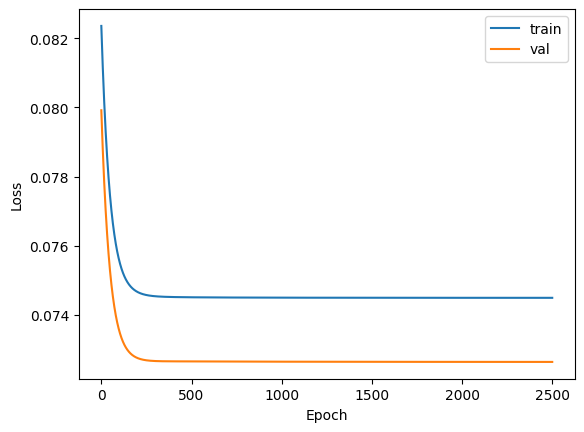

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class ScratchLinearRegression():
    def __init__(self, num_iter=2500, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    def _gradient_descent(self, X, error):
        gradient = np.dot(X.T, error) / X.shape[0]
        self.coef_ -= self.lr * gradient

    def predict(self, X):
        if not self.no_bias and X.shape[1] == self.coef_.shape[0] - 1:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self._linear_hypothesis(X)

    def MSE(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def lossfunction(self, y_pred, y):
        return self.MSE(y_pred, y)

    def fit(self, X, y, X_val=None, y_val=None):
        num_features = X.shape[1] + (not self.no_bias)
        self.coef_ = np.random.randn(num_features) * 0.01

        if not self.no_bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

        for i in range(self.iter):
            pred = self.predict(X)
            error = pred - y
            self._gradient_descent(X, error)
            self.loss[i] = self.lossfunction(pred, y)
            if X_val is not None and y_val is not None:
                pred_val = self.predict(X_val)
                self.val_loss[i] = self.lossfunction(pred_val, y_val)
            if self.verbose and i % 10 == 0:
                val_loss = self.val_loss[i] if X_val is not None else 0
                print(f"Epoch {i}, Loss: {self.loss[i]:.4f}, Val Loss: {val_loss:.4f}")


# Load dataset
df = pd.read_csv('application_train.csv')

features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']
target = 'TARGET'

df = df[features + [target]].dropna()
X = df[features].values
y = df[target].values

# Normalize and add squared terms

X_cube = X**3
X = np.concatenate([X, X_cube], axis=1)

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = ScratchLinearRegression(num_iter=2500, lr=0.01, no_bias=False, verbose=True)
model.fit(X_train, y_train, X_test, y_test)
# Prediction and evaluation
y_pred = model.predict(X_test)
mse = model.MSE(y_pred, y_test)
print(f"Mean Squared Error: {mse}")

# Visualization
plt.plot(model.loss, label='train')
plt.plot(model.val_loss, label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

(Advanced problem) Local optimum solution

The accuracy of the estimation improved when the squared or cubed feature values were used as input. In this code, the cubed feature value gave higher accuracy in the early stages of the iterations than the squared feature value, but the degree of convergence was the same as far as calculations went.
